# Imports

In [1]:
import ipydeps

ipydeps.pip([
    'pandas',
    'matplotlib'
])

import pandas as pd
import matplotlib.pyplot as plt

import os, sys, json

C:\Users\kaleb\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\kaleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# KNN Results

### Dataset 1

In [13]:
with open('data/mushroom_knn.json', 'r') as file:
    shroom_knn = json.load(file)

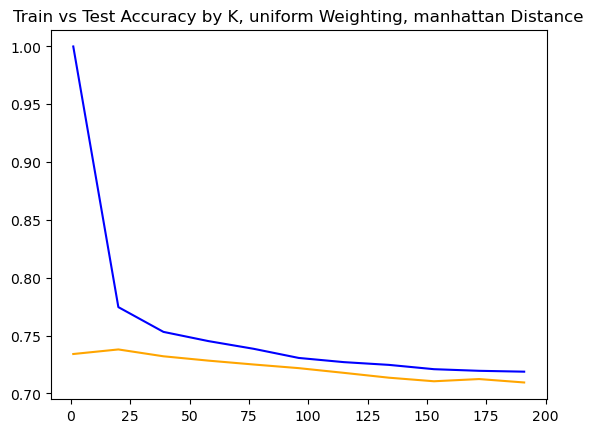

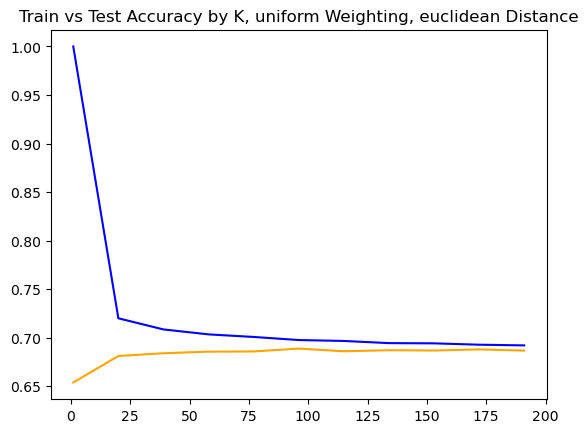

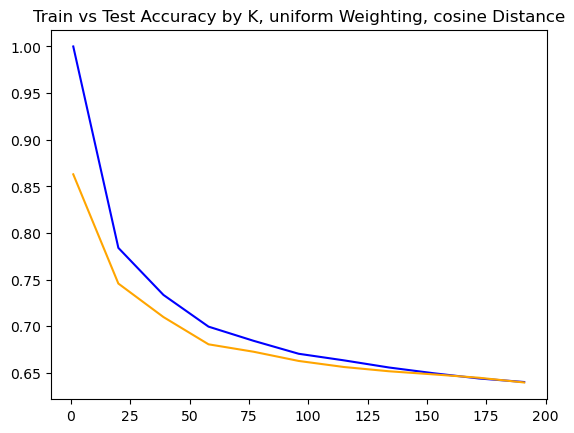

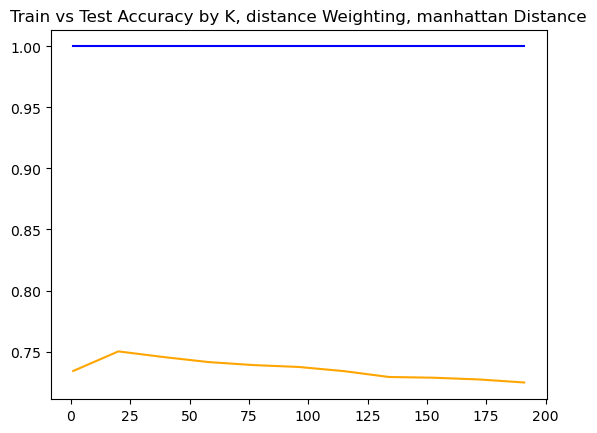

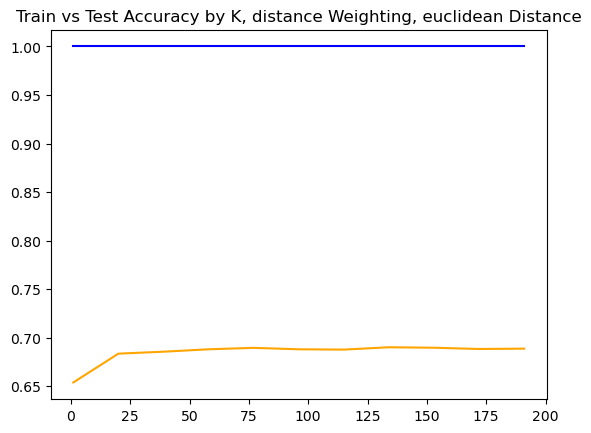

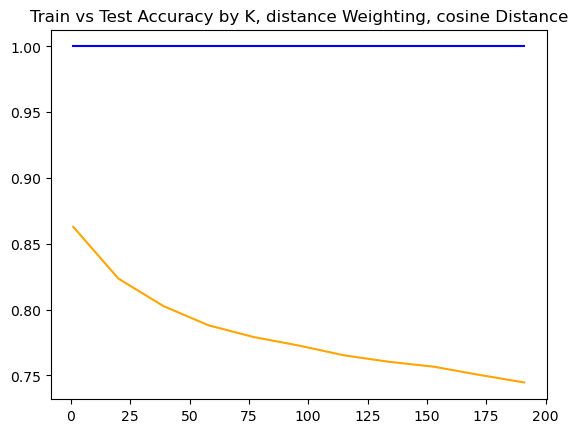

In [14]:
for weighting in ['uniform', 'distance']:
    for metric in ['manhattan', 'euclidean', 'cosine']:
        k = [row['k'] for row in shroom_knn if row['weighting']==weighting and row['metric']==metric]
        train_accuracy = [row['train_accuracy'] for row in shroom_knn if row['weighting']==weighting and row['metric']==metric]
        test_accuracy = [row['test_accuracy'] for row in shroom_knn if row['weighting']==weighting and row['metric']==metric]
        plt.plot(k, train_accuracy, c='blue')
        plt.plot(k, test_accuracy, c='orange')
        plt.title(f'Train vs Test Accuracy by K, {weighting} Weighting, {metric} Distance')
        plt.show()

### Dataset 2

In [15]:
with open('data/heart_knn.json', 'r') as file:
    heart_knn = json.load(file)

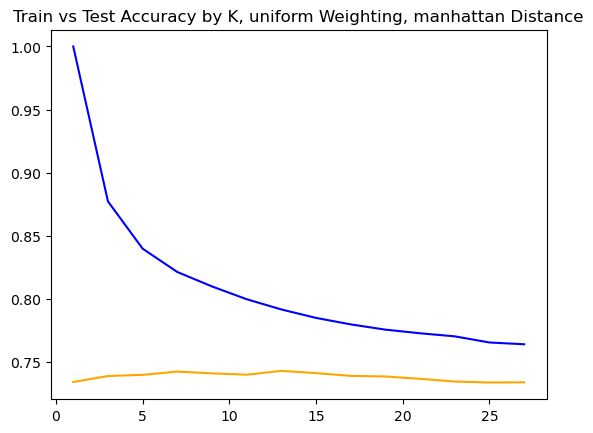

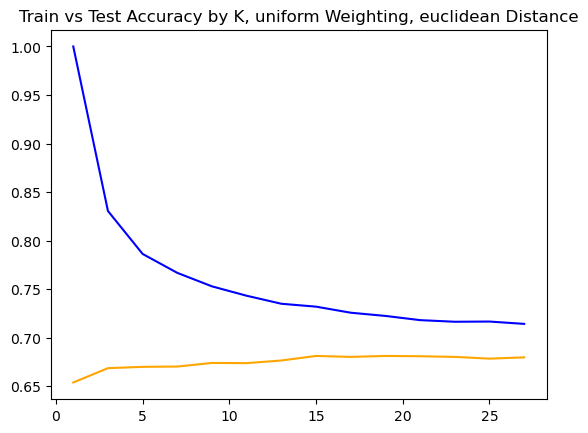

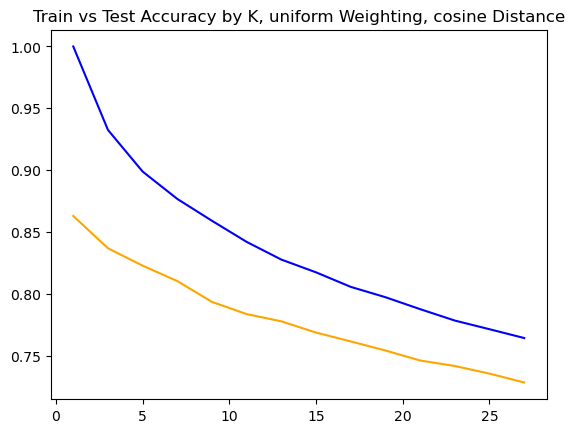

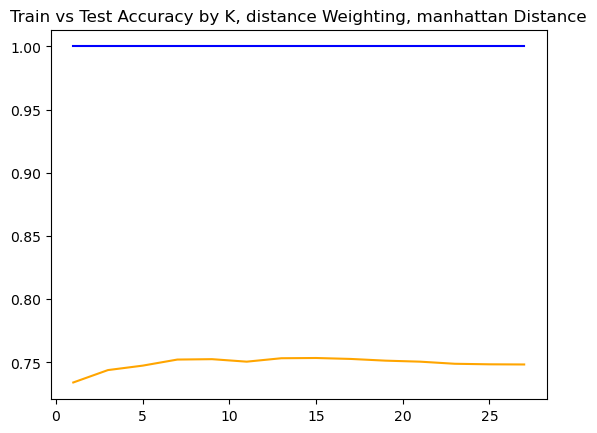

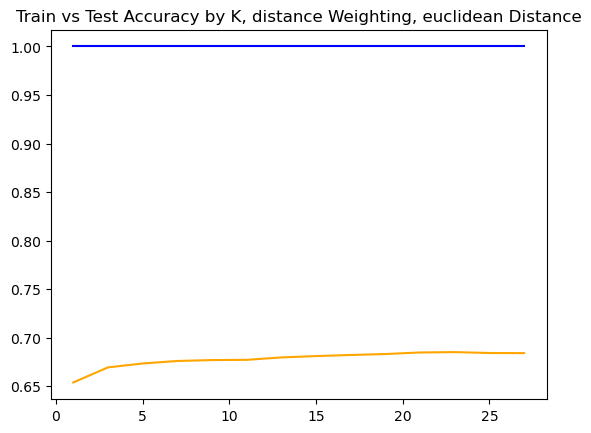

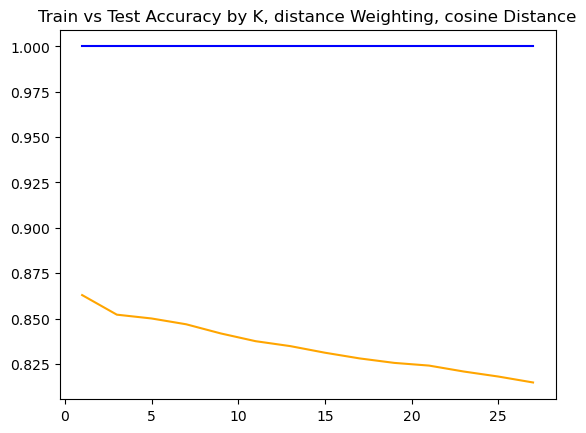

In [16]:
for weighting in ['uniform', 'distance']:
    for metric in ['manhattan', 'euclidean', 'cosine']:
        k = [row['k'] for row in heart_knn if row['weighting']==weighting and row['metric']==metric]
        train_accuracy = [row['train_accuracy'] for row in heart_knn if row['weighting']==weighting and row['metric']==metric]
        test_accuracy = [row['test_accuracy'] for row in heart_knn if row['weighting']==weighting and row['metric']==metric]
        plt.plot(k, train_accuracy, c='blue')
        plt.plot(k, test_accuracy, c='orange')
        plt.title(f'Train vs Test Accuracy by K, {weighting} Weighting, {metric} Distance')
        plt.show()

# Neural Nets

In [33]:
def plot_nn_results(filename, title=None):
    with open(filename, 'r') as file:
        results = json.load(file)
    plt.plot(results['accuracy'], c='blue')
    plt.plot(results['val_accuracy'], c='orange')
    if title:
        plt.title(title)
    plt.show()
    return results

heart_nn1.json


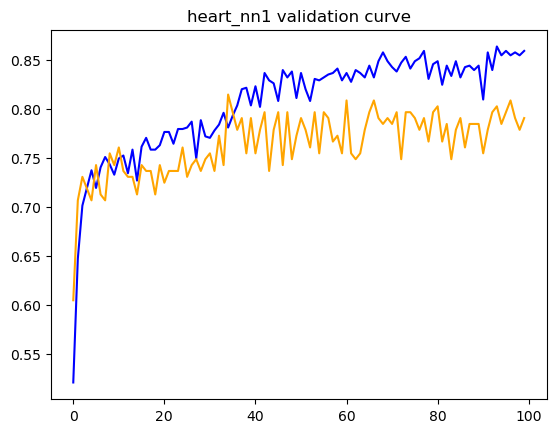

heart_nn2.json


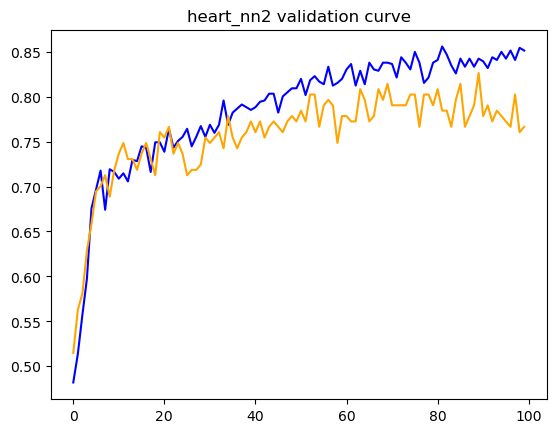

heart_nn3.json


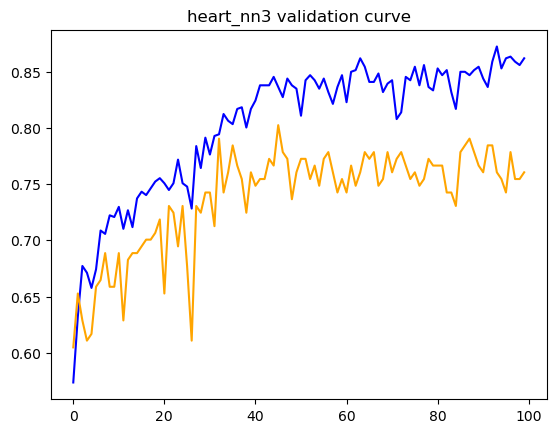

heart_nn4.json


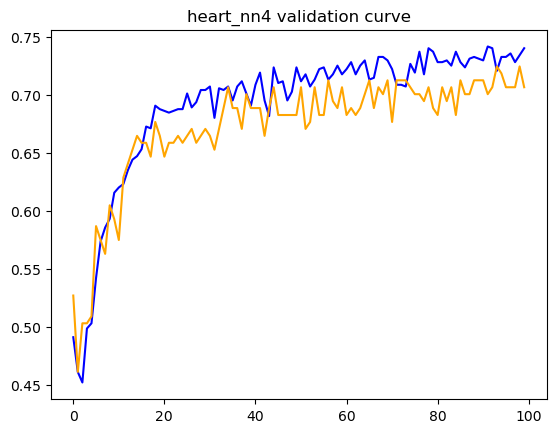

mushroom_nn1.json


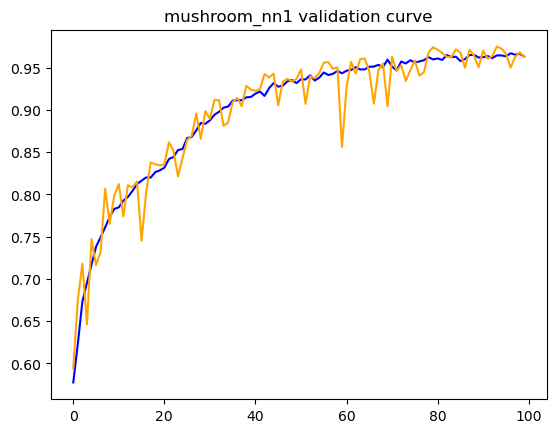

mushroom_nn2.json


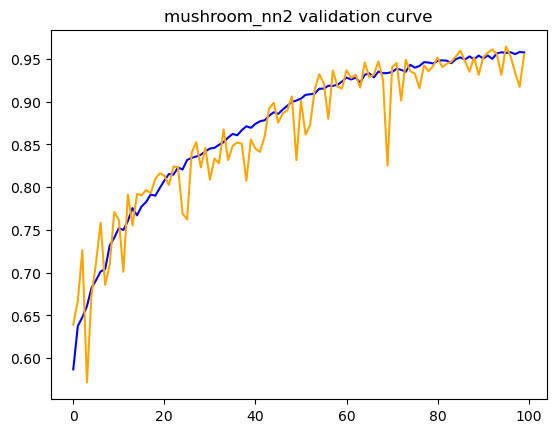

mushroom_nn3.json


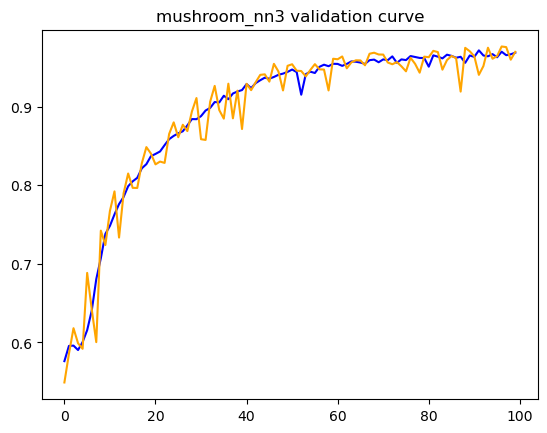

mushroom_nn4.json


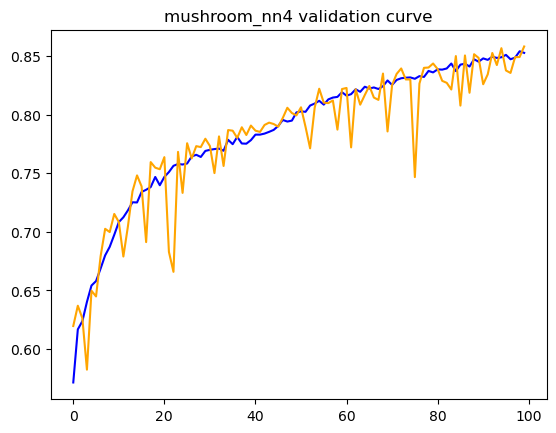

In [37]:
for filename in os.listdir('data'):
    if '_nn' in filename:
        print(filename)
        plot_nn_results(f'data/{filename}', title=f'{filename.split(".")[0]} validation curve')

## SVM

### Dataset 1

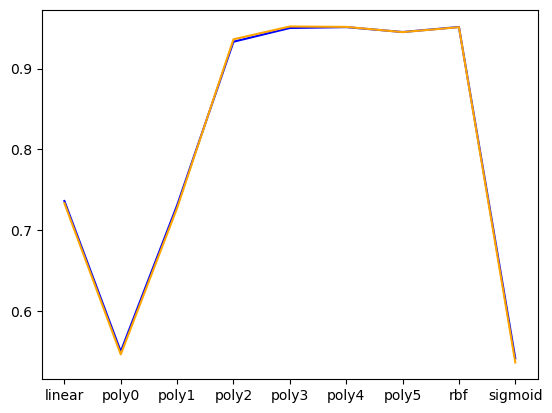

In [47]:
with open('data/mushroom_svc.json', 'r') as file:
    shroom_svc = json.load(file)
    
shroom_svc2 = [
    {
        'kernel': row['kernel'] if row['kernel']!='poly' else row['kernel']+str(row['degree']), 
        'train_accuracy': row['train_accuracy'],
        'test_accuracy': row['test_accuracy']
    } for row in shroom_svc
]

def plot_svc2(svc):
    kernels = [row['kernel'] for row in svc]
    trains = [row['train_accuracy'] for row in svc]
    tests = [row['test_accuracy'] for row in svc]
    plt.plot(kernels, trains, c='blue')
    plt.plot(kernels, tests, c='orange')
    plt.show()
    
plot_svc2(shroom_svc2)

### Dataset 2

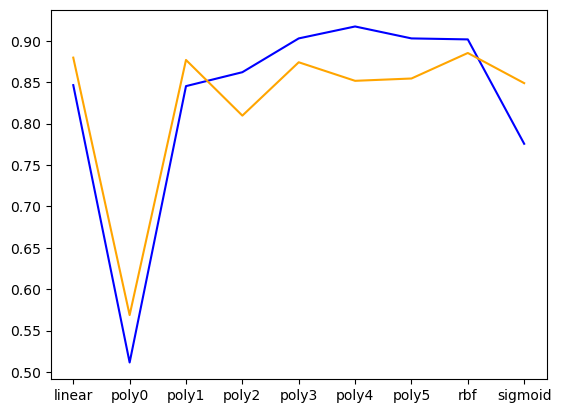

In [48]:
with open('data/heart_svc.json', 'r') as file:
    heart_svc = json.load(file)
    
heart_svc2 = [
    {
        'kernel': row['kernel'] if row['kernel']!='poly' else row['kernel']+str(row['degree']), 
        'train_accuracy': row['train_accuracy'],
        'test_accuracy': row['test_accuracy']
    } for row in heart_svc
]

plot_svc2(heart_svc2)